<a href="https://colab.research.google.com/github/Jum-eng/Adding-Salt-and-Pepper-to-Images-and-Removing-them-using-Mean-and-Media-Filters/blob/main/Removing_Noise_from_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

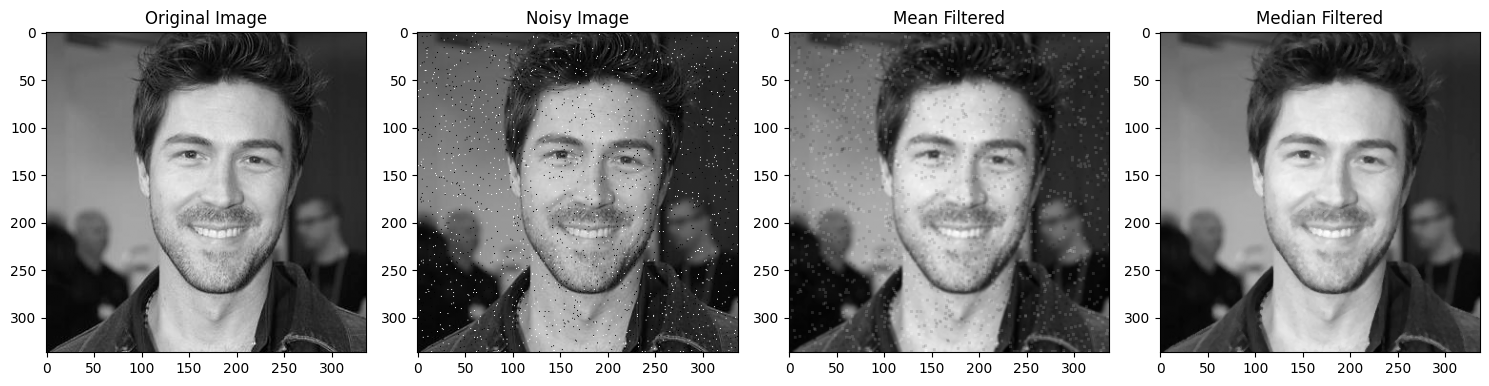

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Add salt-and-pepper noise
def add_salt_and_pepper_noise(image, amount=0.02):
    noisy = image.copy()
    num_salt = int(amount * image.size * 0.5)
    num_pepper = int(amount * image.size * 0.5)

    # Add salt
    coords = [np.random.randint(0, i, num_salt) for i in image.shape]
    noisy[tuple(coords)] = 255

    # Add pepper
    coords = [np.random.randint(0, i, num_pepper) for i in image.shape]
    noisy[tuple(coords)] = 0

    return noisy

# Remove noise using mean and median filters
def remove_noise(image):
    mean_filtered = cv2.blur(image, (3, 3))  # Mean filter
    median_filtered = cv2.medianBlur(image, 3)  # Median filter
    return mean_filtered, median_filtered

# Load an example image
image = cv2.imread('01.jpg', 0)  # Grayscale
noisy_image = add_salt_and_pepper_noise(image)

mean_filtered, median_filtered = remove_noise(noisy_image)

# Display results
plt.figure(figsize=(15, 8))
plt.subplot(1, 4, 1), plt.title("Original Image"), plt.imshow(image, cmap='gray')
plt.subplot(1, 4, 2), plt.title("Noisy Image"), plt.imshow(noisy_image, cmap='gray')
plt.subplot(1, 4, 3), plt.title("Mean Filtered"), plt.imshow(mean_filtered, cmap='gray')
plt.subplot(1, 4, 4), plt.title("Median Filtered"), plt.imshow(median_filtered, cmap='gray')
plt.tight_layout()
plt.show()